# Deep Learning for Handwritten Digit Recognition using MNIST Dataset



**1. Data Loading and Preprocessing:**

• Download the MNIST dataset and load it into your preferred development environment (e.g., Python).

• Preprocess the data by normalizing pixel values and splitting it into training and testing sets.


**2. Baseline Model with Traditional Machine Learning Algorithms:**

• Implement a baseline model using traditional machine learning algorithms such as logistic regression.

• Evaluate the baseline model's performance using appropriate evaluation metrics.

**3. Ensemble of Machine Learning Algorithms:**

• Create an ensemble of three different machine learning algorithms (e.g., Decision Trees, Random Forest, Support Vector Machines) and train them on the
MNIST dataset.

• Combine the predictions of individual models using techniques such as averaging or voting.

• Evaluate the ensemble model's performance and compare it with the baseline model.

**4. Neural Network Model Design:**

• Design and implement multiple neural network architectures for handwritten digit recognition.

• Experiment with different network architectures, including variations in the number of layers, neurons per layer, activation functions, and regularization
techniques.

• Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting.

**5. Hyperparameter Tuning and Overfitting Mitigation:**

• Perform hyperparameter tuning for the best-performing neural network architecture using techniques like Grid Search or Random Search.

• Implement strategies to mitigate overfitting in neural networks, such as dropout regularization or early stopping.

• Evaluate the tuned model's performance and compare it with the baseline and ensemble models.

**6. Feature Transformation and Visualization:**

• Apply Principal Component Analysis (PCA) to transform the original data into a lower-dimensional space.

• Train a neural network model on the PCA-transformed data and compare its performance with the model trained on the original data.

• Visualize the high-dimensional MNIST data in a 2D space using t-Distributed Stochastic Neighbor Embedding (t-SNE) and interpret the results.

In [1]:
pip install keras scikit-learn

In [2]:
pip install keras==2.12.0

In [3]:
# imports
import sklearn
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sys
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

# Data Loading & preprocessing

In [ ]:
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Print the keys of the dataset
print(mnist.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
# split to target and features
X = mnist["data"]
y = mnist["target"]

In [ ]:
# Normalize pixel values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

# Baseline Model with Traditional Machine Learning Algorithms

In [ ]:
# splitting it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
logistic_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100)
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Multinomial Logistic Regression Accuracy:", accuracy)

Multinomial Logistic Regression Accuracy: 0.9183571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.92      0.97      0.94      1600
           2       0.93      0.90      0.91      1380
           3       0.90      0.89      0.90      1433
           4       0.91      0.93      0.92      1295
           5       0.89      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.92      0.94      0.93      1503
           8       0.91      0.85      0.88      1357
           9       0.91      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



# Ensemble of Machine Learning Algorithms:

In [ ]:
models = [

    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

for name, model in models:
    print(f"Training {name} model...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("\n")


Training Decision Tree model...
Evaluation results for Decision Tree:
Accuracy: 0.8725714285714286
Precision: 0.8722786389589166
Recall: 0.8725714285714286
F1-score: 0.8723547480612527


Training Random Forest model...
Evaluation results for Random Forest:
Accuracy: 0.9666428571428571
Precision: 0.9666490933060709
Recall: 0.9666428571428571
F1-score: 0.9666243030570875


Training Support Vector Machine model...
Evaluation results for Support Vector Machine:
Accuracy: 0.9631428571428572
Precision: 0.9633654172967059
Recall: 0.9631428571428572
F1-score: 0.963154023780342




In [ ]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

ensemble = VotingClassifier(estimators=[('dt', decision_tree), ('rf', random_forest), ('svm', svm)], voting='hard')
ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

# Evaluate
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy:", accuracy_ensemble)

Ensemble Accuracy: 0.9677142857142857


# Neural Network Model Design:

In [4]:
mnist_data = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist_data.load_data()


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_val = X_val / 255.0

## Structure 1

In [6]:
from keras.models import Sequential

model_1 = Sequential()

model_1.add(keras.layers.Flatten(input_shape=(28,28)))
model_1.add(keras.layers.Dense(128, activation = 'relu'))
model_1.add(keras.layers.Dense(128, activation = 'relu'))
# Dropout(0.3)
model_1.add(keras.layers.Dense(64, activation = 'relu'))
model_1.add(keras.layers.Dense(10, activation = 'softmax'))


model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_1 = model_1.fit(X_train , y_train , validation_data = (X_val , y_val) , epochs=10 , batch_size = 256)

Epoch 1/10
188/188 [==============================] - 10s 43ms/step - loss: 0.4843 - accuracy: 0.8646 - val_loss: 0.2030 - val_accuracy: 0.9424
Epoch 2/10
188/188 [==============================] - 6s 31ms/step - loss: 0.1724 - accuracy: 0.9498 - val_loss: 0.1519 - val_accuracy: 0.9558
Epoch 3/10
188/188 [==============================] - 4s 23ms/step - loss: 0.1194 - accuracy: 0.9644 - val_loss: 0.1217 - val_accuracy: 0.9645
Epoch 4/10
188/188 [==============================] - 3s 17ms/step - loss: 0.0926 - accuracy: 0.9730 - val_loss: 0.1174 - val_accuracy: 0.9638
Epoch 5/10
188/188 [==============================] - 4s 19ms/step - loss: 0.0733 - accuracy: 0.9780 - val_loss: 0.1043 - val_accuracy: 0.9688
Epoch 6/10
188/188 [==============================] - 5s 25ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0963 - val_accuracy: 0.9720
Epoch 7/10
188/188 [==============================] - 4s 21ms/step - loss: 0.0481 - accuracy: 0.9856 - val_loss: 0.0916 - val_accuracy: 0.974

In [7]:
# Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting.
Model_1_loss , Model_1_accuracy = model_1.evaluate(X_test , y_test)
print("The loss of Model 1:", Model_1_loss)
print("The accuracy of Model 1:" , Model_1_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 17.6239 - accuracy: 0.9745
The loss of Model 1: 17.62394142150879
The accuracy of Model 1: 0.9745000004768372


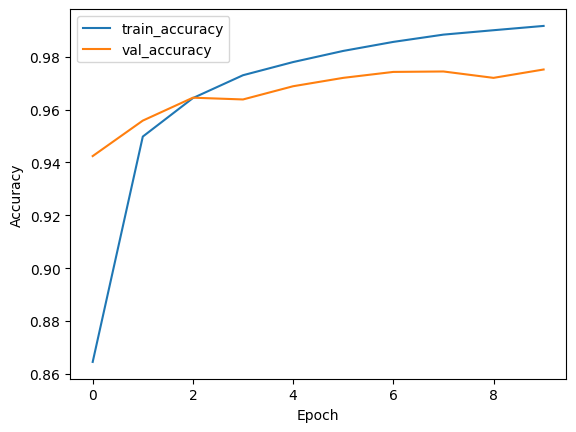

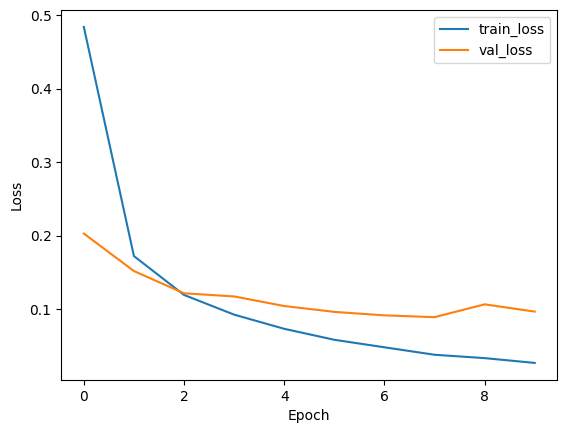

In [8]:
plt.plot(history_1.history['accuracy'], label='train_accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'], label='train_loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



## Stucture 2

In [ ]:
# Model 2: Deep Neural Network
tf.random.set_seed(42)
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
history_Two = model_2.history

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 1.2963 - accuracy: 0.8415 - val_loss: 0.3463 - val_accuracy: 0.9107
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2608 - accuracy: 0.9308 - val_loss: 0.2357 - val_accuracy: 0.9369
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2008 - accuracy: 0.9455 - val_loss: 0.2280 - val_accuracy: 0.9439
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1638 - accuracy: 0.9541 - val_loss: 0.1853 - val_accuracy: 0.9527
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1395 - accuracy: 0.9606 - val_loss: 0.2057 - val_accuracy: 0.9542
Epoch 6/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1215 - accuracy: 0.9647 - val_loss: 0.1571 - val_accuracy: 0.9548
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1109 - accuracy: 0.9688 - val_loss: 0.1543 - val_accuracy:

In [ ]:
# Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting.
Model_2_loss , Model_2_accuracy = model_2.evaluate(X_test , y_test)
print("The loss of Model 2:", Model_2_loss)
print("The accuracy of Model 2:" , Model_2_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1771 - accuracy: 0.9746
The loss of Model 2: 0.17709632217884064
The accuracy of Model 2: 0.9746000170707703


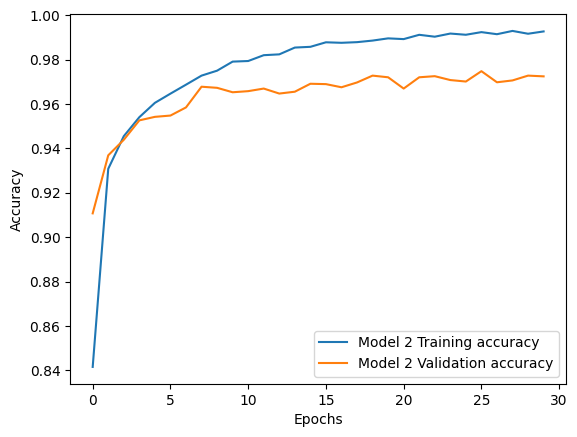

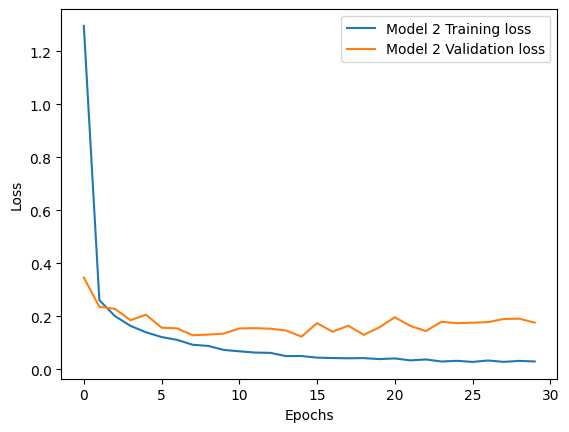

In [ ]:
# Plot training and validation accuracy
plt.plot(history_Two.history['accuracy'], label='Model 2 Training accuracy')
plt.plot(history_Two.history['val_accuracy'], label='Model 2 Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_Two.history['loss'], label='Model 2 Training loss')
plt.plot(history_Two.history['val_loss'], label='Model 2 Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Structure 3

In [6]:

from keras.models import Sequential
model_3 = tf.keras.models.Sequential( [
    tf.keras.layers.Flatten(input_shape=(28,28)) ,
    tf.keras.layers.Dense(128  , activation = 'relu'),
    tf.keras.layers.Dense(64 , activation = 'relu'),
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

model_3.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
history_3 = model_3.fit(X_train , y_train , validation_data = (X_val , y_val) ,  epochs = 20 , batch_size = 256)

Epoch 1/20
188/188 [==============================] - 8s 25ms/step - loss: 0.6111 - accuracy: 0.8121 - val_loss: 0.2368 - val_accuracy: 0.9316
Epoch 2/20
188/188 [==============================] - 4s 19ms/step - loss: 0.1996 - accuracy: 0.9421 - val_loss: 0.1610 - val_accuracy: 0.9540
Epoch 3/20
188/188 [==============================] - 3s 17ms/step - loss: 0.1387 - accuracy: 0.9595 - val_loss: 0.1365 - val_accuracy: 0.9598
Epoch 4/20
188/188 [==============================] - 3s 17ms/step - loss: 0.1103 - accuracy: 0.9673 - val_loss: 0.1122 - val_accuracy: 0.9681
Epoch 5/20
188/188 [==============================] - 4s 21ms/step - loss: 0.0895 - accuracy: 0.9735 - val_loss: 0.1060 - val_accuracy: 0.9690
Epoch 6/20
188/188 [==============================] - 4s 19ms/step - loss: 0.0732 - accuracy: 0.9778 - val_loss: 0.1009 - val_accuracy: 0.9692
Epoch 7/20
188/188 [==============================] - 3s 16ms/step - loss: 0.0608 - accuracy: 0.9817 - val_loss: 0.0897 - val_accuracy: 0.9728

In [7]:
# Train each neural network model on the MNIST dataset and evaluate its performance and report overfitting.
Model_3_loss , Model_3_accuracy = model_3.evaluate(X_test , y_test)
print("The loss of Model 3:", Model_3_loss)
print("The accuracy of Model 3:" , Model_3_accuracy)

313/313 [==============================] - 3s 5ms/step - loss: 28.2949 - accuracy: 0.9714
The loss of Model 3: 28.29490089416504
The accuracy of Model 3: 0.9714000225067139


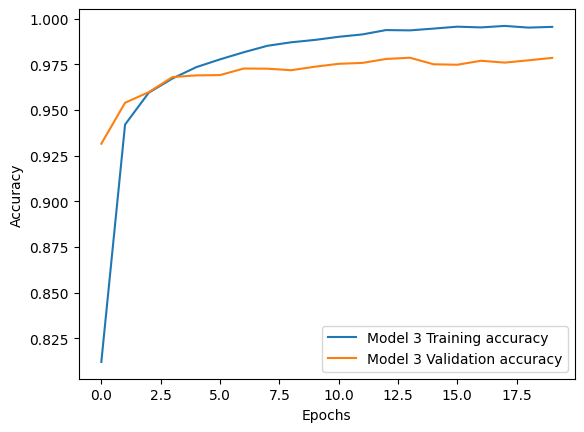

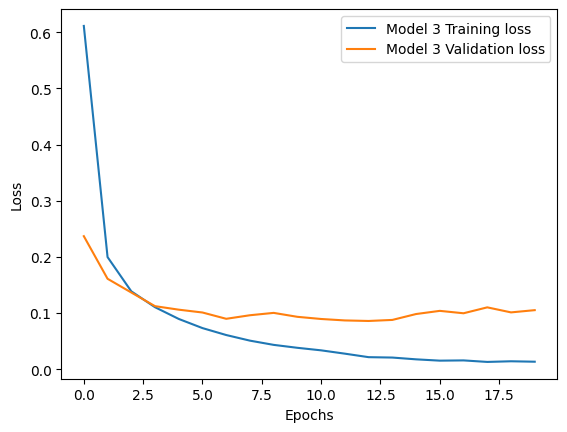

In [8]:
# Plot training and validation accuracy
plt.plot(history_3.history['accuracy'], label='Model 3 Training accuracy')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_3.history['loss'], label='Model 3 Training loss')
plt.plot(history_3.history['val_loss'], label='Model 3 Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Hyperparameter Tuning and Overfitting Mitigation:

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=5, max_value=10, default=2)
    n_neurons = hp.Int("n_neurons", min_value=32, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [ ]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=2, overwrite=True,
    directory="my_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train_full,  y_train_full, epochs=30,
                           validation_data=(X_val, y_val))

Trial 2 Complete [00h 05m 24s]
val_accuracy: 0.9979166388511658

Best val_accuracy So Far: 0.9979166388511658
Total elapsed time: 00h 08m 52s


In [ ]:
top_three = random_search_tuner.get_best_hyperparameters(num_trials=3)
best_model = random_search_tuner.hypermodel.build(top_three[0])

In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 10,
 'n_neurons': 111,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [ ]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 10
n_neurons: 111
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.9979166388511658


In [ ]:
best_trial.metrics.get_last_value("val_accuracy")

0.9979166388511658

In [ ]:
best_model.fit(X_train_full, y_train_full, epochs=30)
test_loss, test_accuracy = best_model.evaluate(X_test_2, y_test_2)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0096 - accuracy: 0.9977
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0098 - accuracy: 0.9975
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0067 - accuracy: 0.9986
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0054 - accuracy: 0.9988
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0040 - accuracy: 0.9995
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0032 - accuracy: 0.9997
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0027 - accuracy: 0.9998
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0024 - accuracy: 0.9997
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.001

Evaluate the tuned model's performance and compare it with the baseline and ensemble models.



- The tuned neural network model exhibits the highest accuracy among the three models tested, indicating its effectiveness in capturing the intricate patterns present in the handwritten digit dataset.
- While the ensemble model performs well, it falls slightly short of the tuned neural network in terms of accuracy. However, ensembles remain a valuable technique for improving predictive performance, especially when combining diverse models.
- The logistic regression baseline, while simple and interpretable, demonstrates the lowest accuracy among the models tested. This highlights the limitations of linear models in capturing the complexities of handwritten digit recognition tasks.

In conclusion, the tuned neural network model emerges as the most effective approach for handwritten digit recognition, achieving the highest accuracy on the test dataset. However, the ensemble model also showcases competitive performance, underscoring the benefits of leveraging multiple models for improved accuracy.

# Feature Transformation and Visualization:


In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1).astype(np.float32) / 255.0
X_val_flattened = X_val.reshape(X_val.shape[0], -1).astype(np.float32) / 255.0
X_test_flattened = X_test_2.reshape(X_test_2.shape[0], -1).astype(np.float32) / 255.0

In [ ]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flattened)
X_val_pca = pca.transform(X_val_flattened)
X_test_pca = pca.transform(X_test_flattened)

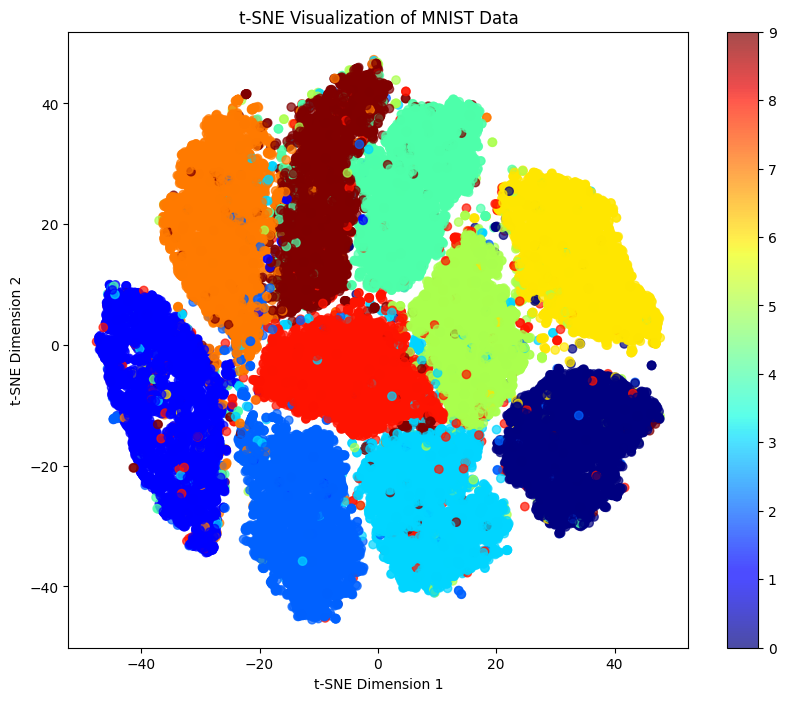

In [ ]:
tsne = TSNE(n_components=2, random_state=42 , n_iter=500)
X_train_tsne = tsne.fit_transform(X_train_flattened)

plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train.astype(int), cmap='jet', alpha=0.7)
plt.colorbar()
plt.title('t-SNE Visualization of MNIST Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
# Train a neural network model on the PCA-transformed data and compare its performance with the model trained on the original data.
model_pca = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model_pca.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_pca = model_pca.fit(X_train_pca, y_train, epochs=30, validation_data=(X_val_pca, y_val))

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3048 - accuracy: 0.9069 - val_loss: 0.1336 - val_accuracy: 0.9575
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.9673 - val_loss: 0.1083 - val_accuracy: 0.9673
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9755 - val_loss: 0.0949 - val_accuracy: 0.9696
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0618 - accuracy: 0.9803 - val_loss: 0.0867 - val_accuracy: 0.9732
Epoch 5/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0917 - val_accuracy: 0.9733
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.1001 - val_accuracy: 0.9711
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0983 - val_accuracy:

In [ ]:
test_loss_pca, test_accuracy_pca = model_pca.evaluate(X_test_pca, y_test_2)
print("Test Loss (PCA):", test_loss_pca)
print("Test Accuracy (PCA):", test_accuracy_pca)

313/313 [==============================] - 1s 1ms/step - loss: 0.1423 - accuracy: 0.9782
Test Loss (PCA): 0.1423252820968628
Test Accuracy (PCA): 0.9782000184059143


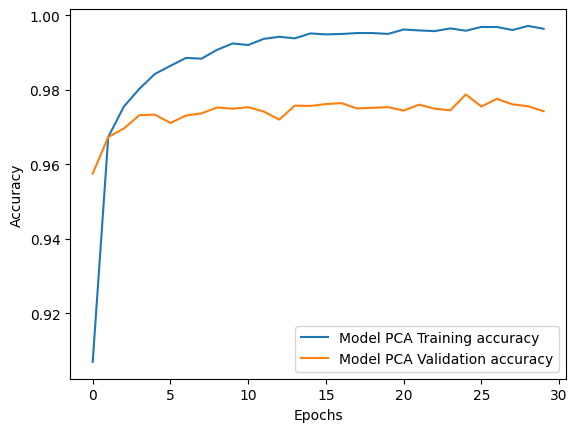

In [ ]:
# Plot training and validation accuracy
plt.plot(history_pca.history['accuracy'], label='Model PCA Training accuracy')
plt.plot(history_pca.history['val_accuracy'], label='Model PCA Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()